# Math 753/853 HW4 Polynomial Interpolation

## Problem 1

**(a)** Write a function `polyeval(c,x)` that implements Horner's method for polynomial interpolation without base points. I.e. given a vector of monomial coefficients $c$ you want to evaluate the polynomial 

\begin{equation*}
P(x) = \sum_{n=0}^{m-1} c_n x^n
\end{equation*}

using Horner's method of nested multiplication. E.g. write the function so that it evaluates the polynomial 

\begin{equation*}
P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4
\end{equation*}

with this series of multiplications and additions

\begin{equation*}
P(x) = c_0 + x \, [c_1 + x \, [c_2 + x \, [c_3 + x \, c_4]]]
\end{equation*}

Your function should have inputs $c$ and $x$, and it should return $P(x)$. Make sure the function works when $x$ is a vector, returning a vector of values $P(x)$. Your function should also work equally well on all numerical types. 

**Warning:** Note that the natural mathematical expressions for polynomials have indices that start at 0, but that
Julia and many other programming languages use indices that start at 1. You'll have to negotiate this difference when writing your Horner evaluation function 

In [37]:
function polyeval(c,x)
    #we want to start with last c
    n = length(c)
    s = c[n]
    for i = n-1:-1:1
        #s is the partial sum of the polynomial
        s = c[i] + x.* s
    end
    return s
end

polyeval (generic function with 1 method)

**(b)** Test your `polyeval(c,x)` function on a simple quadratic or cubic polynomial of your choice. Do this by constructing a simple polynomial function in Julia, e.g. $f(x) = 1 + 2x - 3x^2$, plotting a few points `(x, f(x))` with dots, and then plotting the same polynomial as a smooth line using your `polyeval` function with inputs `c=[1 2 -3]` and an `x` vector created with `linspace`. Label the axes and add a legend that shows which symbol is for the datapoints and which is for `polyeval`.

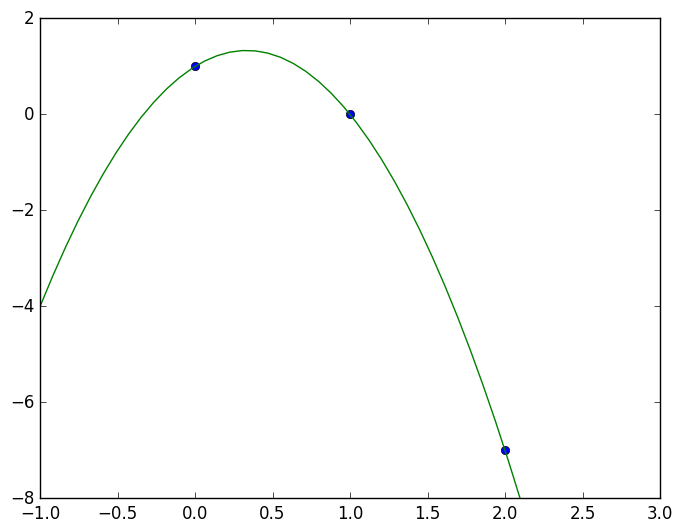

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000029A7E550>

In [43]:
using PyPlot

f(x) = 1 + 2x - 3x.^2
x = [0 1 2]
plot(x,f(x),"bo")
xlim(-1, 3)
ylim(-8, 2)

b = linspace(-1,3,50)
c = [1 2 -3]
p = polyeval(c,b)
plot(b,p,"g-")

## Problem 2

**(a).** Write a function `polyeval(c,b,x)` that implements Horner's method for polynomial interpolation *with*  base points. E.g. given a vector of five coefficients `c` and four base points `b` you want to evaluate the polynomial 

\begin{equation*}
P(x) = c_0 + (x - b_0) \, [c_1 + (x - b_1) [c_2 + (x - b_2) [c_3 + (x - b_3) \, c_4]]]
\end{equation*}

Your function should have inputs `c`, `b`, and `x`, and as in problem 1(a), it should work on vectors `x` of arbitrary numeric type. 

In [16]:
function polyeval(c,b,x)
    #we want to start with last c
    n = length(c)
    s = c[n]
    for i = n-1:-1:1
        #s is the partial sum of the polynomial
        s = c[i] + (x - b[i]).* s
    end
    return s
end

polyeval (generic function with 1 method)

**(b)** As in problem 1(b), test your `polyeval(c,b,x)` function on a simple polynomial graphically.

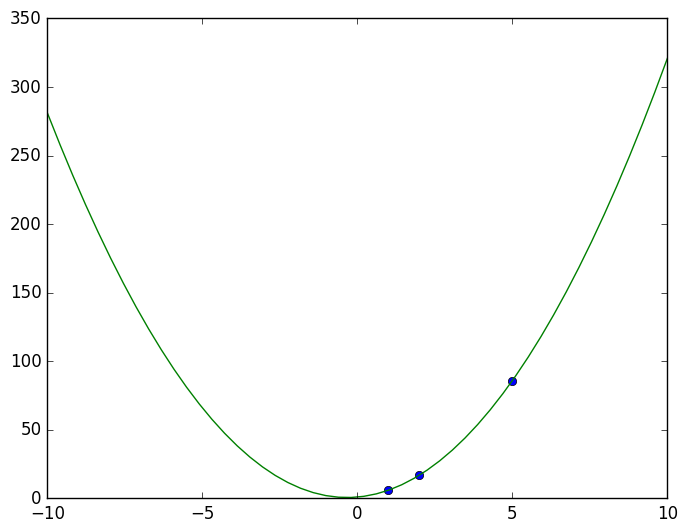

[86,17,6]


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000028B53470>

In [28]:
using PyPlot

y = [5; 2; 1]
f(x) = 1 + 2x + 3x.^2
plot(y,f(y),"bo")
println(f(y))

c = [86; 23; 3]
b = [5; 2]
x = linspace(-10, 10)
t = polyeval(c,b,x)
plot(x, t, "g-")

# Problem 3

**(a)** To familiarize yourself with the Newton Divided Differences algorithm, work out on paper (or in text/markdown in this notebook) the cubic interpolating polynomial for the $(x,y)$ data points $(-2,8), (0, 4), (1,2), (3,-3)$. 

In [ ]:
#xi         yi=f[xi]     f[xi xi+1]         f[xi xi+1 xi+2]         f[xi xi+1 xi+2 xi+3]

#x1 = -2    y1 = 8       4-8/0--2 = -2      -2--2/-2-1 = 0          (0--1/6)/-2-3 = -1/30
#x2 = 0     y2 = 4       2-4/1-0 = -2       (-2--5/2)/0-3 = -1/6
#x3 = 1     y3 = 2       -3-2/3-1 = -5/2
#x4 = 3     y4 = -3

#So polynomial P(x) = 8 + -2(x + 2) + 0(x + 2)(x - 0) + -1/30(x + 2)(x - 0)(x - 1)
#P(x) = (-x^3)/30 - (x^2)/30 - 29x/30 + 4 ????

**(b)** Make a plot that verifies your interpolating polynomial graphically, showing the data points as dots and the interpolant as a smooth curve.

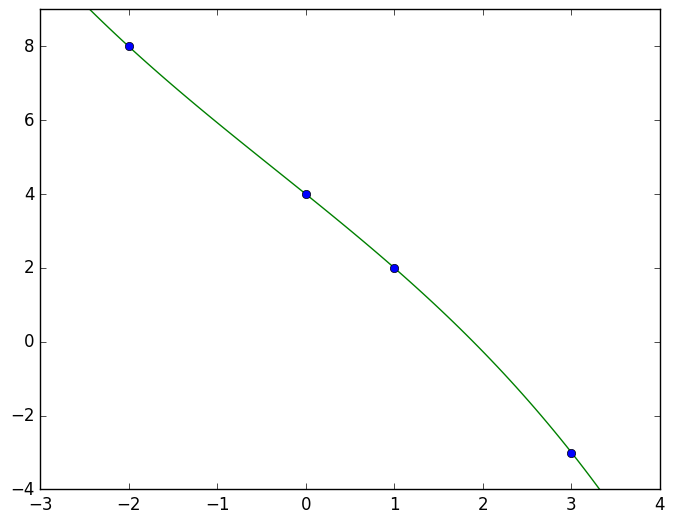

(-4,9)

In [244]:
using PyPlot

x = linspace(-3,4,100)
P(x) = 8 + -2.*(x + 2) + 0.*(x + 2).*(x - 0) + (-1/30).*(x + 2).*(x - 0).*(x - 1)
plot(x,P(x),"g-")

c=[-2 0 1 3]
y=[8 4 2 -3]
plot(c,y,"bo")
xlim(-3, 4)
ylim(-4, 9)

# Problem 4

**(a)** Write a function ``newtondivdiff(x,y)`` that returns `(c,b)`, the polynomial coefficients `c` and the base points `b` for the polynomial interpolant that passes through the data points $(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)$. The return values $c$ and $b$ should be arranged to pass directly into your `polyeval(c,b)` function from problem 2.

In [56]:
function newtondivdiff(x,y)
    x = float(x)
    y = float(y)
    n = length(x)
    f = copy(y)
    c = ones(n)
    c[1] = copy(f[1])
    b = copy(x)
    pop!(b)
    for i = 1:n-1
        for j = 1:(n-i)
            f[j] = (f[j] - f[j+1]) ./ (x[j] - x[j+i])
        end
        c[i+1] = copy(f[1])
        pop!(f)
    end
    return c, b
end

newtondivdiff (generic function with 1 method)

**(b)** Test your ``newtondivdiff(x,y)`` function with this series of steps

  1. construct a quadratic or cubic polynomial, e.g. $f(x) = 1 + 2x - 3x^2$
  2. construct a vector `xdata` with three values for a quadratic, or four for a cubic, e.g. `xdata = [-2 -1 1]`.
  3. evaluate $f$ at `xdata` to get a vector of $y$ values `ydata`
  4. compute the coefficients `c` and basepoints `b` of the polynomial interpolant using `newtondivdiff(xdata, ydata)`
  5. evaluate your polynomial interpolant on a large number of $x$ points, e.g. `x = linspace(-2, 2); y = polyeval(c,b,x)`
  6. make a plot showing the datapoints `xdata, ydata` with dots and the smooth curve `x,y` with a line.
  7. label the axes and provide a legend
  

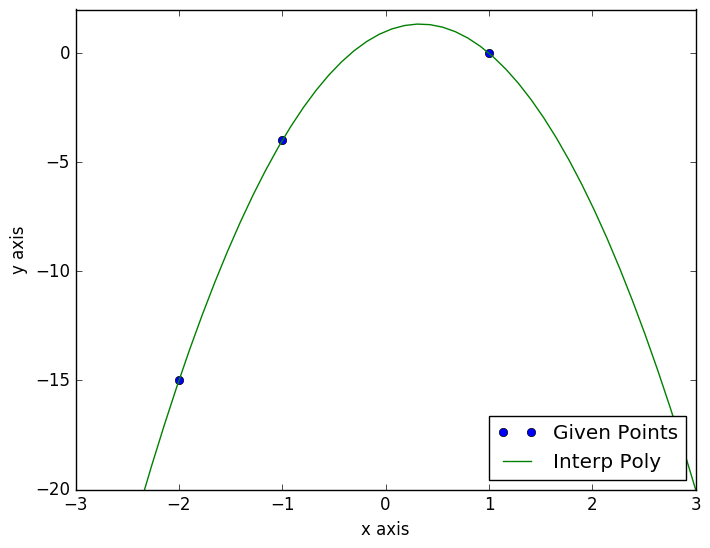

PyObject <matplotlib.legend.Legend object at 0x0000000028478C50>

In [48]:
f(x) = 1 + 2x - 3x.^2
xdata = [-2; -1; 1]
ydata = f(xdata)
c, b = newtondivdiff(xdata, ydata)

x = linspace(-3, 3)
y = polyeval(c,b,x)

using PyPlot
plot(xdata, ydata,"bo", label="Given Points")
plot(x,y,"g-",label="Interp Poly")

xlim(-3, 3)
ylim(-20, 2)
xlabel("x axis")
ylabel("y axis")
legend(loc="lower right")


## Problem 5



The expected lifetime of an industrial fan decreases with operating temperature, according to the experimental data in this table

\begin{array}{c|c}
temp~F & weeks \\
77 & 57 \\
104 & 45 \\
122 & 38 \\
140 & 32 
\end{array}

Estimate the expected fan lifetime at 160 degrees Farenheit using polynomial interpolation. Make a plot showing the datapoints with dots and the interpolant over the range 50 to 160 weeks.

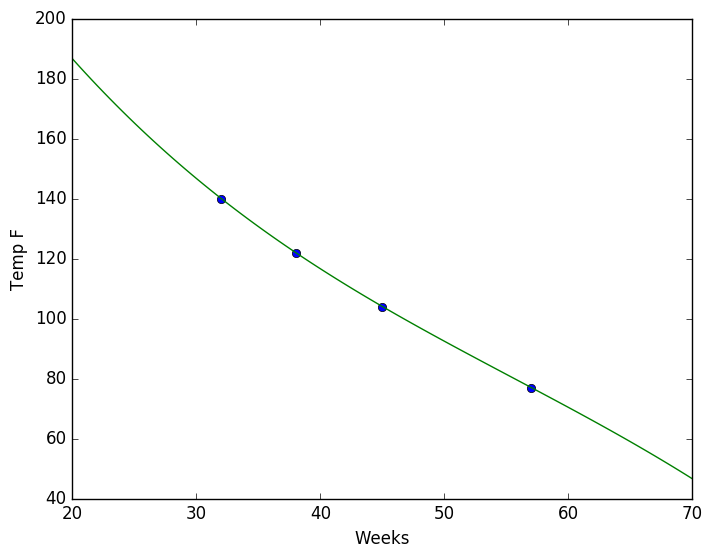

PyObject <matplotlib.text.Text object at 0x000000002D090550>

In [64]:
using PyPlot
temp = [77; 104; 122; 140]
weeks = [57; 45; 38; 32]
plot(weeks,temp,"bo")
x = linspace(20, 70, 100)
c,b = newtondivdiff(weeks,temp)
p = polyeval(c,b,x)
plot(x,p,"g-")
xlabel("Weeks")
ylabel("Temp F")
#Expected fan lifetime at 160 degrees is 28 weeks

## Problem 6

**(a)** Given these estimates of world human population over the last fifty years

\begin{array}{c|l}
year & population~(billions) \\
1960 & 3.026 \\
1970 & 3.691 \\
1980 & 4.449 \\
1990 & 5.321 \\
2000 & 6.128 \\
2010 & 6.916 
\end{array}

estimate the world population in 2025 by extrapolating the polynomial interpolant. 


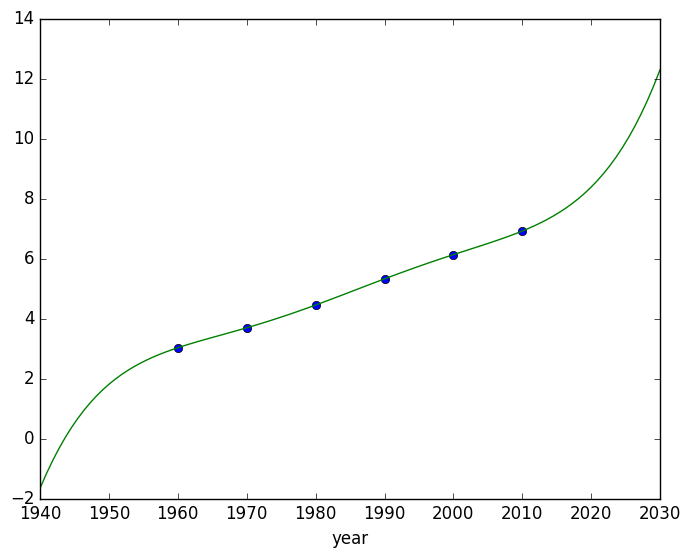

Estimated population in 2025 is 9.86719921874999 billion

In [81]:
year = [1960; 1970; 1980; 1990; 2000; 2010]
pop = [3.026; 3.691; 4.449; 5.321; 6.128; 6.916]
plot(year,pop,"bo")

c,b = newtondivdiff(year,pop)
x = linspace(1940, 2030, 100)
p = polyeval(c,b,x)
plot(x,p,"g-")
xlabel("year")
#ylabel("population") #I get an error when this is not commented I can't figure out why

d = polyeval(c,b,2025)

print("Estimated population in 2025 is ")
print(d)
print(" billion")

**(b)** Add the current estimated world population of 7.404 billion in 2016 to the data set and give a revised estimate of 2025 population.

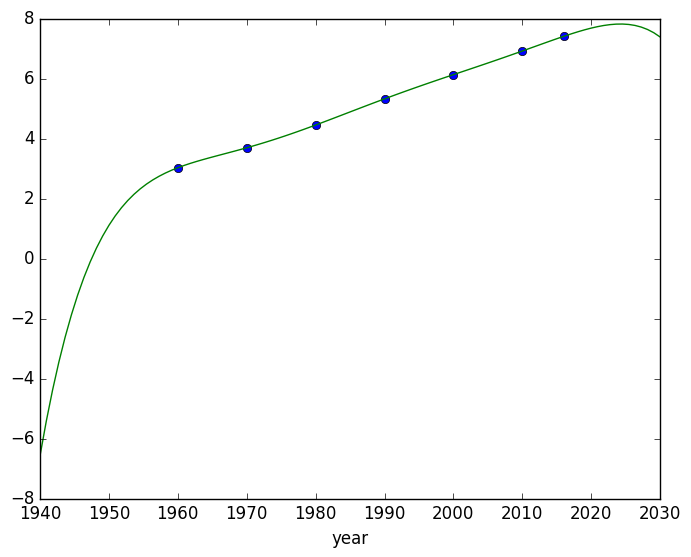

Estimated population in 2025 is 7.810654127038043 billion

In [84]:
year = [1960; 1970; 1980; 1990; 2000; 2010; 2016]
pop = [3.026; 3.691; 4.449; 5.321; 6.128; 6.916; 7.404]
plot(year,pop,"bo")

c,b = newtondivdiff(year,pop)
x = linspace(1940, 2030, 100)
p = polyeval(c,b,x)
plot(x,p,"g-")
xlabel("year")
#ylabel("population") #I get an error when this is not commented I can't figure out why

d = polyeval(c,b,2025)

print("Estimated population in 2025 is ")
print(d)
print(" billion")

**(c)** Make a plot showing the datapoints and the two polynomial interpolants over the range 1950 to 2030. Plot the  interpolant without the 2016 data in blue and with the 2016 data in red. 

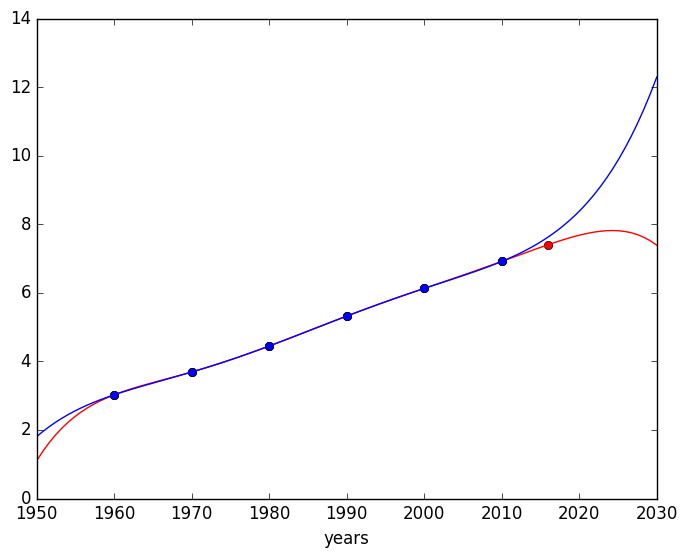

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002DF957B8>

In [88]:
year = [1960; 1970; 1980; 1990; 2000; 2010; 2016]
pop = [3.026; 3.691; 4.449; 5.321; 6.128; 6.916; 7.404]
plot(year,pop,"ro")
xlabel("years")

c,b = newtondivdiff(year,pop)
x = linspace(1950, 2030, 100)
p = polyeval(c,b,x)
plot(x,p,"r-")

year = [1960; 1970; 1980; 1990; 2000; 2010]
pop = [3.026; 3.691; 4.449; 5.321; 6.128; 6.916]
plot(year,pop,"bo")

c,b = newtondivdiff(year,pop)
p = polyeval(c,b,x)
plot(x,p,"b-")

**(d)** What conclusions do you draw from the difference between the two curves? 

In [ ]:
#Population rate of increase is slowing down (decreasing) compared to the past.